In [24]:
# Step 1: Import necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [25]:
# Step 2: Load the dataset
df = pd.read_csv("Wholesale customers data.csv")

In [26]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [27]:
# Step 3: Drop non-numeric or categorical columns (optional)
# Some versions of this dataset include 'Channel' and 'Region'
# They're categorical and not needed for this clustering
# In clustering, we generally use numerical values. or we can convert categorical values into numerical by processing them if needed.

df = df.drop(columns=['Channel','Region'] ,errors='ignore')
# Try to drop these columns... but if they don’t exist, don’t raise an error. Just ignore it.


In [28]:
# Step 4: Select the features for clustering
# X contains the selected numeric features (all product category spending).
X = df.copy()

In [29]:
# Step 5: Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [30]:
# Step 6: Create a linkage matrix for dendrogram
#Calculates distances between data points and creates the linkage matrix,
# used to build the dendrogram. We use ward linkage, which minimizes variance within clusters.
linked = linkage(X_scaled, method = 'ward')


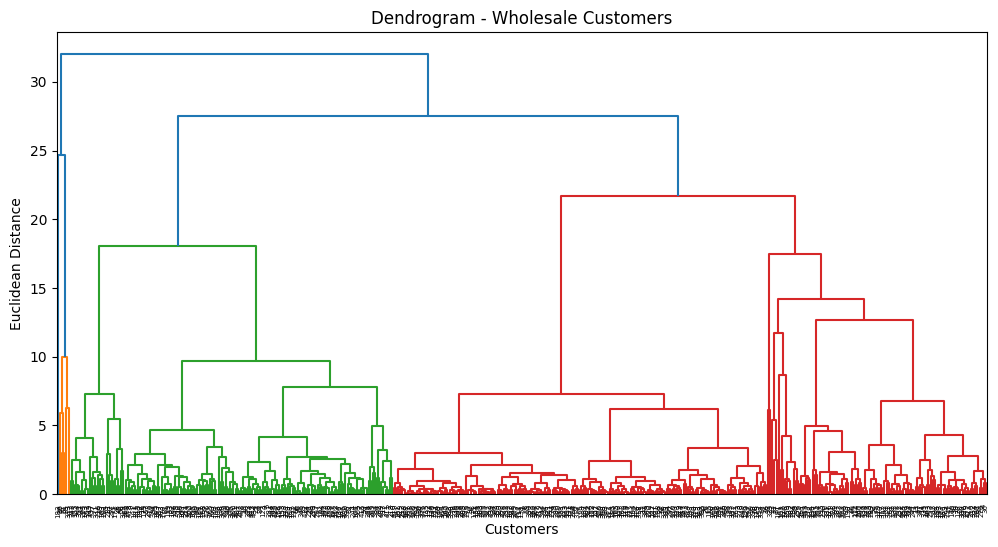

In [32]:
# Step 7: Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='ascending',
           show_leaf_counts=True)
plt.title('Dendrogram - Wholesale Customers')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.show()






In [34]:
# Step 8: Apply Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=4, linkage='complete', metric='euclidean')
labels = model.fit_predict(X_scaled)


In [36]:
# Step 9: Add the labels to the original DataFrame
# Adds the cluster result back to the original data.
df['Cluster'] = labels


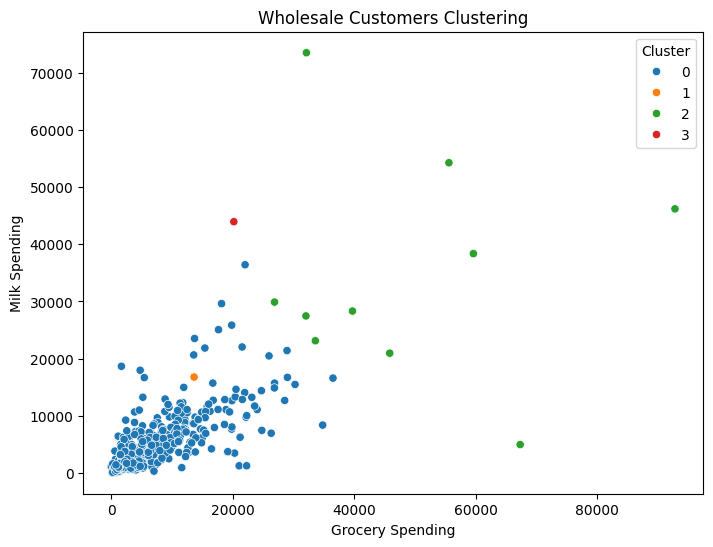

In [37]:
# Step 10: Visualize clusters (using 2 features for simplicity)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['Grocery'], y=X['Milk'], hue=labels, palette='tab10')
plt.title('Wholesale Customers Clustering')
plt.xlabel('Grocery Spending')
plt.ylabel('Milk Spending')
plt.legend(title='Cluster')
plt.show()


In [38]:
df.to_csv('clustered_wholesale_customers.csv', index=False)


In [39]:
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

                Fresh          Milk       Grocery        Frozen  \
Cluster                                                           
0        11802.351288   5010.416862   6972.681499   2783.822014   
1        22015.500000   9937.000000   7844.000000  47939.000000   
2        15964.900000  34708.500000  48536.900000   3054.600000   
3        36847.000000  43950.000000  20170.000000  36534.000000   

         Detergents_Paper    Delicassen  
Cluster                                  
0             2382.957845   1370.644028  
1              671.500000   4153.500000  
2            24875.200000   2942.800000  
3              239.000000  47943.000000  


In [40]:
# Interpretation:
# Cluster 0:
# Moderate spending across most categories, with highest spending in Fresh and Grocery but relatively low on Milk and Delicatessen.
# → Possibly smaller restaurants or fresh food sellers focused on fresh produce.

# Cluster 1:
# Extremely high spending on Frozen (47,939) and Delicatessen (4,154), with moderate spending in Fresh and Grocery, but low in Detergents_Paper.
# → Likely businesses specializing in frozen goods — maybe catering services or frozen food retailers.

# Cluster 2:
# Very high spending on Milk (34,709), Grocery (48,537), and Detergents_Paper (24,875), but low on Frozen.
# → Probably supermarkets or convenience stores with a focus on dairy, grocery, and cleaning supplies.

# Cluster 3:
# Highest spending in Fresh (36,847), Milk (43,950), Frozen (36,534), and Delicatessen (47,943), but very low on Detergents_Paper.
# → Could be large wholesalers or big supermarkets with diverse product demands.

# What can you do with this?
# Targeted marketing: Tailor campaigns to cluster needs — e.g., promote frozen products to Cluster 1, detergents and paper products to Cluster 2.

# Sales strategy: Assign sales reps specialized by cluster product profiles.

# Inventory management: Stock items in line with cluster purchasing behavior.

# Customized offers: Create bundle offers fitting each cluster’s preferences.